In [1]:
import pandas as pd
wine_df = pd.read_csv("../datasets/winequalityN.csv")
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
wine_df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [3]:
wine_df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [4]:
wine_df.shape

(6497, 13)

In [5]:
wine_df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
wine_df.dropna(inplace=True)

In [7]:
from sklearn.calibration import LabelEncoder
le = LabelEncoder()
wine_df['type'] = le.fit_transform(wine_df['type'])

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.model_selection import train_test_split
X = wine_df.drop(columns='type')
y = wine_df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=rs)

In [11]:
X_train.shape, X_test.shape

((5170, 12), (1293, 12))

In [14]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score

model = LogisticRegression(random_state=rs, max_iter=1000).fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(y_test, preds)

0.9860788863109049

In [15]:
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

In [17]:
result = evaluate(y_test, preds, "Original")
result

{'type': 'Original',
 'accuracy': 0.9860788863109049,
 'recall': 0.9938398357289527,
 'auc': 0.9781111404350092,
 'precision': 0.9877551020408163,
 'fscore': 0.9936044216344255}

<Axes: xlabel='type'>

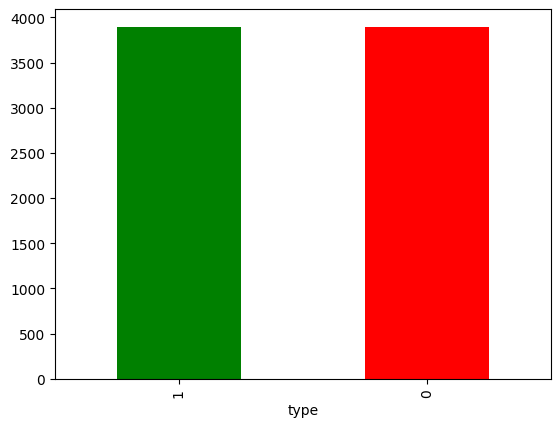

In [23]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote_sampler = SMOTE(random_state=rs)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
y_smo.value_counts().plot.bar(color=['green', 'red'])

In [25]:
model = LogisticRegression(random_state=rs, max_iter=1000)
preds = model.fit(X_smo, y_smo).predict(X_test)
evaluate(y_test, preds)

{'type': 'Original',
 'accuracy': 0.9845320959010054,
 'recall': 0.9866529774127311,
 'auc': 0.9823547018725097,
 'precision': 0.9927685950413223,
 'fscore': 0.9868867999052058}

In [28]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":accuracy_score(y_test, model.predict(X_test)),"train Accuracy": accuracy_score(y_train, model.predict(X_train))}

In [27]:
from xgboost import XGBClassifier

In [29]:
objective='binary:logistic'
random_state=0
n_estimators=5
learning_rate=0.1

In [30]:
model = XGBClassifier(objective=objective, learning_rate=learning_rate, n_estimator=n_estimators, eval_metric = 'mlogloss')

In [31]:
model.fit(X_train, y_train)
get_accuracy(X_train, X_test, y_train, y_test, model)

f:\DATA SCIENCE\Python_Files\.venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


{'test Accuracy': 0.9930394431554525, 'train Accuracy': 0.9998065764023211}